Importing dependencies for the projct

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10


Dataset Preprocessing

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile,' 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


Image normalizatoin

In [0]:
X_train - X_train/255.0

In [0]:
X_test - X_test/255.0

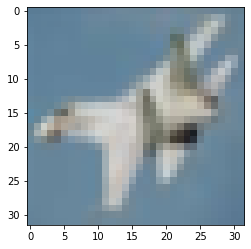

In [7]:
plt.imshow(X_test[10])

Building the Concolutional Neural Network

In [0]:
#Defining the model
model = tf.keras.models.Sequential()

Adding the CNN Layers

In [11]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding = "same", activation = 'relu', input_shape = [32, 32, 3]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, padding="same", activation="relu" ))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding ="same"))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=62, kernel_size=3, padding = "same", activation="relu"))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding = 'same'))

Flattening the layers

In [0]:
model.add(tf.keras.layers.Flatten())

Adding the Dense and Dropout layers

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dropout(0.40))

In [0]:
model.add(tf.keras.layers.Dense(units =10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 62)        17918     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        35776     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

Compiling the model

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

Training the model

In [24]:
model.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 282s 6ms/sample - loss: 1.8220 - sparse_categorical_accuracy: 0.3617
Epoch 2/10
50000/50000 [==============================] - 282s 6ms/sample - loss: 1.3324 - sparse_categorical_accuracy: 0.5251
Epoch 3/10
50000/50000 [==============================] - 281s 6ms/sample - loss: 1.1699 - sparse_categorical_accuracy: 0.5898
Epoch 4/10
50000/50000 [==============================] - 278s 6ms/sample - loss: 1.0592 - sparse_categorical_accuracy: 0.6316
Epoch 5/10
50000/50000 [==============================] - 279s 6ms/sample - loss: 0.9860 - sparse_categorical_accuracy: 0.6566
Epoch 6/10
50000/50000 [==============================] - 283s 6ms/sample - loss: 0.9203 - sparse_categorical_accuracy: 0.6791
Epoch 7/10
50000/50000 [==============================] - 283s 6ms/sample - loss: 0.8598 - sparse_categorical_accuracy: 0.6971
Epoch 8/10
50000/50000 [==============================] - 280s 6ms/sample - loss: 0.8107

Model Evaluation and Prediction

In [25]:
test_loss, Test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 15s 1ms/sample - loss: 0.9262 - sparse_categorical_accuracy: 0.7061
